In [1]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [2]:
# !kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [3]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [20]:
## creating a model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                      

In [21]:
## compiling a model 
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
## getting the data from the folders
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_dataset = image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [23]:
## this is the augmentation configuration we will use for training

from tensorflow import keras
from keras import layers

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

train_dataset = train_dataset.map(lambda x,y: (data_augmentation(x),y))

In [28]:
## using early stopping callback
from keras.callbacks import EarlyStopping

es_callback = EarlyStopping(patience=10,restore_best_weights=True)

In [29]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=15, callbacks=[es_callback])

Epoch 1/15
625/625 [==============================] - 59s 94ms/step - loss: 0.4365 - accuracy: 0.7940 - val_loss: 0.5616 - val_accuracy: 0.6314
Epoch 2/15
625/625 [==============================] - 58s 92ms/step - loss: 0.3752 - accuracy: 0.8237 - val_loss: 0.5033 - val_accuracy: 0.7640
Epoch 3/15
625/625 [==============================] - 58s 92ms/step - loss: 0.3198 - accuracy: 0.8471 - val_loss: 0.4911 - val_accuracy: 0.7722
Epoch 4/15
625/625 [==============================] - 57s 91ms/step - loss: 0.2758 - accuracy: 0.8687 - val_loss: 0.5869 - val_accuracy: 0.7568
Epoch 5/15
625/625 [==============================] - 58s 93ms/step - loss: 0.2373 - accuracy: 0.8838 - val_loss: 0.6045 - val_accuracy: 0.7688
Epoch 6/15
625/625 [==============================] - 58s 92ms/step - loss: 0.2145 - accuracy: 0.8943 - val_loss: 0.6483 - val_accuracy: 0.7832
Epoch 7/15
625/625 [==============================] - 58s 92ms/step - loss: 0.1838 - accuracy: 0.9089 - val_loss: 0.8171 - val_accuracy:

In [32]:
model.save("data_aug.h5")

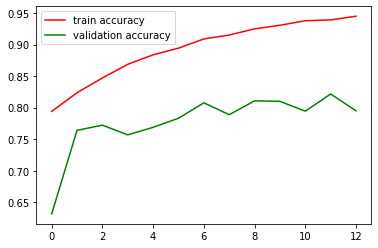

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='validation accuracy')
plt.legend()
plt.show()

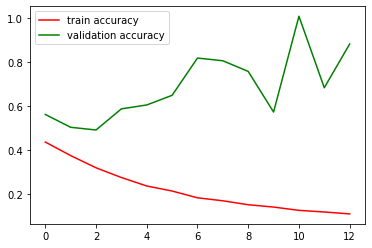

In [31]:
plt.plot(history.history['loss'],color='red',label='train accuracy')
plt.plot(history.history['val_loss'], color='green', label='validation accuracy')
plt.legend()
plt.show()